In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/GNN/data/train (1).csv")
test = pd.read_csv("/content/drive/MyDrive/GNN/data/test (1).csv")
valid = pd.read_csv("/content/drive/MyDrive/GNN/data/valid (1).csv")


In [ ]:
train.head(20)

,func_x,func_y,Label
0,void sort(int a[]) throws Exception {\n ...,public String readCustomTemplate(String sp...,0.0
1,public static String md5(String value) thr...,public static void main(String[] args) thr...,0.0
2,"public static void copy(File source, File ...",private void preprocessImages(GeoImage[] d...,1.0
3,public void execute(HttpResponse response)...,public static String deleteTag(String tag_...,0.0
4,public VeecheckResult performRequest(Veech...,"public void convert(CSVReader reader, Writ...",0.0
5,public void setKey(String key) {\n ...,"private void readXML() throws IOException,...",0.0
6,"public static void copyFile(File source, F...",public static boolean decodeFileToFile(Str...,1.0
7,private Bitmap fetchImage(String urlstr) t...,private void displayDiffResults() throws I...,0.0
8,"String openUrlAsString(String address, int...",public Function findFunction(String functi...,1.0
9,@Override\n public String fetchURL(Stri...,public static String encrypt(String plaint...,0.0


In [ ]:
train.iloc[19]['func_x']

'    public static String hashMD5(String passw) {\n        String passwHash = "";\n        try {\n            MessageDigest md = MessageDigest.getInstance("MD5");\n            md.update(passw.getBytes());\n            byte[] result = md.digest();\n            StringBuffer sb = new StringBuffer();\n            for (int i = 0; i < result.length; i++) {\n                String tmpStr = "0" + Integer.toHexString((0xff & result[i]));\n                sb.append(tmpStr.substring(tmpStr.length() - 2));\n            }\n            passwHash = sb.toString();\n        } catch (NoSuchAlgorithmException ecc) {\n            log.error("Errore algoritmo " + ecc);\n        }\n        return passwHash;\n    }\n'

In [ ]:
train.iloc[19]['func_y']

'    public boolean checkLogin(String pMail, String pMdp) {\n        boolean vLoginOk = false;\n        if (pMail == null || pMdp == null) {\n            throw new IllegalArgumentException("Login and password are mandatory. Null values are forbidden.");\n        }\n        try {\n            Criteria crit = ((Session) this.entityManager.getDelegate()).createCriteria(Client.class);\n            crit.add(Restrictions.ilike("email", pMail));\n            MessageDigest vMd5Instance;\n            try {\n                vMd5Instance = MessageDigest.getInstance("MD5");\n                vMd5Instance.reset();\n                vMd5Instance.update(pMdp.getBytes());\n                byte[] vDigest = vMd5Instance.digest();\n                BigInteger vBigInt = new BigInteger(1, vDigest);\n                String vHashPassword = vBigInt.toString(16);\n                crit.add(Restrictions.eq("mdp", vHashPassword));\n            } catch (NoSuchAlgorithmException e) {\n                e.printStackTrace

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# 3. Vectorize the data using Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
train['func_x_embed'] = train['func_x'].apply(lambda x: embed([x]).numpy()[0])
train['func_y_embed'] = train['func_y'].apply(lambda x: embed([x]).numpy()[0])


In [ ]:
train['concat_embed'] = train.apply(lambda x: np.concatenate((x['func_x_embed'], x['func_y_embed'])), axis=1)

In [ ]:
X_train = np.vstack(train['concat_embed'].values)
y_train = train['Label'].values

In [ ]:
# valid['func_x_embed'] = valid['func_x'].apply(lambda x: embed([x]).numpy()[0])
# valid['func_y_embed'] = valid['func_y'].apply(lambda x: embed([x]).numpy()[0])
# valid['concat_embed'] = valid.apply(lambda x: np.concatenate((x['func_x_embed'], x['func_y_embed'])), axis=1)
# X_valid = np.vstack(valid['concat_embed'].values)
# y_valid = valid['Label'].values

In [ ]:
test['func_x_embed'] = test['func_x'].apply(lambda x: embed([x]).numpy()[0])
test['func_y_embed'] = test['func_y'].apply(lambda x: embed([x]).numpy()[0])
test['concat_embed'] = test.apply(lambda x: np.concatenate((x['func_x_embed'], x['func_y_embed'])), axis=1)
X_test = np.vstack(test['concat_embed'].values)
y_test = test['Label'].values

In [ ]:
len(y_test)

1690

In [ ]:
# 6. Evaluate the model
y_pred = classifier.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("Accuracy: ", accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      1115
         1.0       0.70      0.83      0.76       158

    accuracy                           0.93      1273
   macro avg       0.84      0.89      0.86      1273
weighted avg       0.94      0.93      0.94      1273

Accuracy:  0.9340141398271798


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
param_grid_rf = {
    'n_estimators': list(range(100,200,20)),

}
RF = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=RF, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 120, 140, 160, 180]})

In [ ]:
grid_search_rf.best_params_

{'n_estimators': 120}

In [ ]:
grid_search.best_params_

{'kernel': 'poly'}

In [ ]:
RF_pred = grid_search_rf.predict(X_test)
print("-----------------------------------RF-----------------------------------")
print(classification_report(y_test, RF_pred))

-----------------------------------RF-----------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1481
           1       0.68      0.79      0.73       209

    accuracy                           0.93      1690
   macro avg       0.83      0.87      0.85      1690
weighted avg       0.93      0.93      0.93      1690



In [ ]:
# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for grid search
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Perform grid search using cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
svm_pred = grid_search.predict(X_test)
print("-----------------------------------SVM-----------------------------------")
print(classification_report(y_test, svm_pred))

-----------------------------------SVM-----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1481
           1       0.70      0.88      0.78       209

    accuracy                           0.94      1690
   macro avg       0.84      0.91      0.87      1690
weighted avg       0.95      0.94      0.94      1690



In [ ]:


# svc = SVC()
# knn = KNeighborsClassifier(n_neighbors=5)
# xgb = GradientBoostingClassifier()
# RF.fit(X_train, y_train)
# svc.fit(X_train, y_train)
# knn.fit(X_train, y_train)
# xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# # 6. Evaluate the model
# RF_pred = RF.predict(X_test)
# svc_pred = svc.predict(X_test)
# knn_pred = knn.predict(X_test)
# xgb_pred = xgb.predict(X_test)

# print("-----------------------------------RF-----------------------------------")
# print(classification_report(y_test, RF_pred))
# print("-----------------------------------svc-----------------------------------")
# print(classification_report(y_test, svc_pred))
# print("-----------------------------------knn-----------------------------------")
# print(classification_report(y_test, knn_pred))
# print("-----------------------------------xgb-----------------------------------")
# print(classification_report(y_test, xgb_pred))

-----------------------------------RF-----------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1481
           1       0.67      0.79      0.73       209

    accuracy                           0.93      1690
   macro avg       0.82      0.87      0.84      1690
weighted avg       0.93      0.93      0.93      1690

-----------------------------------svc-----------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1481
           1       0.66      0.88      0.75       209

    accuracy                           0.93      1690
   macro avg       0.82      0.91      0.86      1690
weighted avg       0.94      0.93      0.93      1690

-----------------------------------knn-----------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      1481
           1    

In [ ]:
def plot_CM(y_true,y_pred):
  conf_matrix = confusion_matrix(y_true, y_pred)
# Print the confusion matrix using Matplotlib
#
  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

-----------------------------------RF-----------------------------------


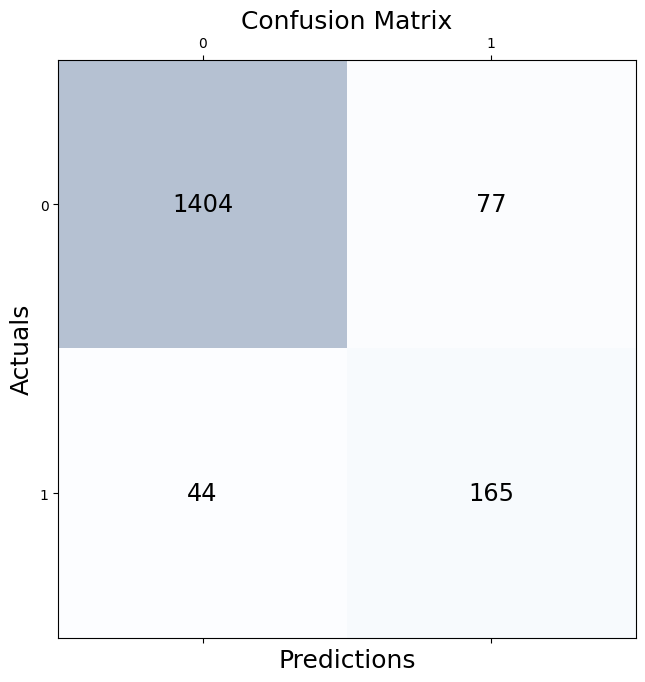

-----------------------------------svc-----------------------------------


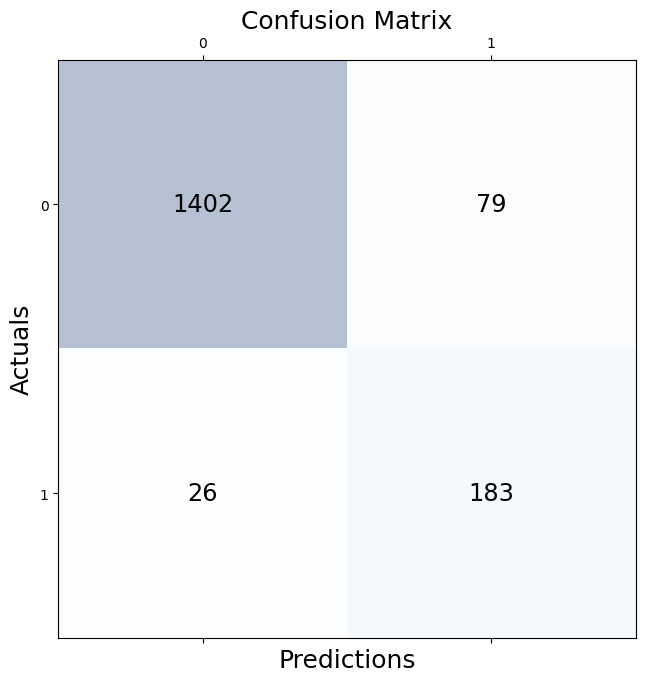

In [ ]:
print("-----------------------------------RF-----------------------------------")
plot_CM(y_test, RF_pred)
print("-----------------------------------svc-----------------------------------")
plot_CM(y_test, svm_pred)


In [ ]:
!pip install tree_sitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tree_sitter: filename=tree_sitter-0.20.1-cp310-cp310-linux_x86_64.whl size=434920 sha256=fc6f902d5cd9d2445967bcbc101118e225b66542c77a7cd912b606310aa61f00
  Stored in directory: /root/.cache/pip/wheels/e6/d0/7a/a108b30f6615a71ca3a07ced1b149509d437a60c9d64820723
Successfully built tree_sitter


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=2cdc8887ea95c4fcb899c31d7378b3b418d323c1b485649cffb745f223560f1e
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=74aa5da13503a106d852e4d3e5990a3a0337323bd5547f4caef0611103ced74b
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow_hub as hub
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the trained model


# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def vectorize(func_x, func_y):
    func_x_embed = embed([func_x]).numpy()[0]
    func_y_embed = embed([func_y]).numpy()[0]
    concat_embed = np.concatenate((func_x_embed, func_y_embed))
    return concat_embed

st.title('Java Function Clone Detection')

func_x = st.text_area("Enter the first Java function:")
func_y = st.text_area("Enter the second Java function:")

if st.button("Predict"):
    if func_x and func_y:
        vector = vectorize(func_x, func_y)
        prediction = grid_search_rf.predict_proba([vector])[0][1]
        st.write(f'The probability that the functions are clones is {prediction:.2f}.')
    else:
        st.write("Please enter both functions.")


2023-05-26 10:18:24.249 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run https://colab.research.google.com/drive/1PBR7RJ7xrvTJAve0zk7CPvvJOMNDf_Qv?usp=share_link

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
# 3. Vectorize the data using CodeBERT
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")

def encode_codebert(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()



KeyboardInterrupt: ignored